In [1]:
!pip install -q -U ../input/kerasapplications/Keras_Applications-1.0.8-py3-none-any.whl
!pip install -q ../input/qubvel/segmentation_models-1.0.0-py3-none-any.whl
!pip install -q ../input/qubvel/efficientnet-1.0.0-py3-none-any.whl


In [2]:
from glob import glob
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from PIL import Image
import tensorflow as tf

import albumentations as A
from tensorflow.keras.applications import EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6


# **Load dataset**

In [3]:
mask_files = glob('../input/hubmap2022-640x640/Hubmap2022_640x640/mask/*/*')
train_files = [file.replace('mask', 'image') for file in mask_files]
print(len(train_files))
print(len(mask_files))


4914
4914


In [4]:
def getid(mask_file):
    list_int = re.findall('\d+', mask_file)
    return int(list_int[-1])
# diagnosis
def diagnosis(mask_path):
  value = np.max(cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE))
  return 1 if value > 0 else 0

df_path = pd.DataFrame({
                   "id": [getid(x) for x in mask_files],
                   "image_path": train_files,
                   "mask_path": mask_files,
                   "diagnosis":[diagnosis(x) for x in mask_files]
})

df = pd.read_csv('../input/hubmap2022-640x640/Hubmap2022_640x640/df_train.csv')
# print(df.columns)
df = df[['id', 'organ']]

# merge 2 df theo id
df_final = pd.merge(df,df_path,on = 'id')
print(df_final.columns)
with pd.option_context("display.max_colwidth", None):
    display(df_final)

Index(['id', 'organ', 'image_path', 'mask_path', 'diagnosis'], dtype='object')


id           organ  \
0     10044        prostate   
1     10044        prostate   
2     10044        prostate   
3     10044        prostate   
4     10044        prostate   
...     ...             ...   
4909   9904  largeintestine   
4910   9904  largeintestine   
4911   9904  largeintestine   
4912   9904  largeintestine   
4913   9904  largeintestine   

                                                                   image_path  \
0     ../input/hubmap2022-640x640/Hubmap2022_640x640/image/10044/12_10044.png   
1      ../input/hubmap2022-640x640/Hubmap2022_640x640/image/10044/8_10044.png   
2      ../input/hubmap2022-640x640/Hubmap2022_640x640/image/10044/0_10044.png   
3      ../input/hubmap2022-640x640/Hubmap2022_640x640/image/10044/3_10044.png   
4      ../input/hubmap2022-640x640/Hubmap2022_640x640/image/10044/1_10044.png   
...                                                                       ...   
4909     ../input/hubmap2022-640x640/Hubmap2022_640x640/image/9904/0_9904.png   
4910     ../input/hubmap2022-640x640/Hubmap2022_640x640/image/9904/1_9904.png   
4911     ../input/hubmap2022-640x640/Hubmap2022_640x640/image/9904/4_9904.png   
4912    ../input/hubmap2022-640x640/Hubmap2022_640x640/image/9904/10_9904.png   
4913     ../input/hubmap2022-640x640/Hubmap2022_640x640/image/9904/8_9904.png   

                                                                   mask_path  \
0     ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/10044/12_10044.png   
1      ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/10044/8_10044.png   
2      ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/10044/0_10044.png   
3      ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/10044/3_10044.png   
4      ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/10044/1_10044.png   
...                                                                      ...   
4909     ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/9904/0_9904.png   
4910     ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/9904/1_9904.png   
4911     ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/9904/4_9904.png   
4912    ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/9904/10_9904.png   
4913     ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/9904/8_9904.png   

      diagnosis  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
4909          1  
4910          1  
4911          1  
4912          1  
4913          1  

[4914 rows x 5 columns]

In [5]:
# df_final =  df_final[df_final['organ']== 'lung'] #['prostate!!!!!!!!' 'spleen!!!!!!!!!!' 'lung!!!!!!!!!!!!!!' 'kidney!!!!!!' 'largeintestine!!!!!!!!!']

df_final = df_final[df_final.organ != 'lung']
with pd.option_context("display.max_colwidth", None):
    display(df_final)



id           organ  \
0     10044        prostate   
1     10044        prostate   
2     10044        prostate   
3     10044        prostate   
4     10044        prostate   
...     ...             ...   
4909   9904  largeintestine   
4910   9904  largeintestine   
4911   9904  largeintestine   
4912   9904  largeintestine   
4913   9904  largeintestine   

                                                                   image_path  \
0     ../input/hubmap2022-640x640/Hubmap2022_640x640/image/10044/12_10044.png   
1      ../input/hubmap2022-640x640/Hubmap2022_640x640/image/10044/8_10044.png   
2      ../input/hubmap2022-640x640/Hubmap2022_640x640/image/10044/0_10044.png   
3      ../input/hubmap2022-640x640/Hubmap2022_640x640/image/10044/3_10044.png   
4      ../input/hubmap2022-640x640/Hubmap2022_640x640/image/10044/1_10044.png   
...                                                                       ...   
4909     ../input/hubmap2022-640x640/Hubmap2022_640x640/image/9904/0_9904.png   
4910     ../input/hubmap2022-640x640/Hubmap2022_640x640/image/9904/1_9904.png   
4911     ../input/hubmap2022-640x640/Hubmap2022_640x640/image/9904/4_9904.png   
4912    ../input/hubmap2022-640x640/Hubmap2022_640x640/image/9904/10_9904.png   
4913     ../input/hubmap2022-640x640/Hubmap2022_640x640/image/9904/8_9904.png   

                                                                   mask_path  \
0     ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/10044/12_10044.png   
1      ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/10044/8_10044.png   
2      ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/10044/0_10044.png   
3      ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/10044/3_10044.png   
4      ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/10044/1_10044.png   
...                                                                      ...   
4909     ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/9904/0_9904.png   
4910     ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/9904/1_9904.png   
4911     ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/9904/4_9904.png   
4912    ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/9904/10_9904.png   
4913     ../input/hubmap2022-640x640/Hubmap2022_640x640/mask/9904/8_9904.png   

      diagnosis  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
4909          1  
4910          1  
4911          1  
4912          1  
4913          1  

[4242 rows x 5 columns]

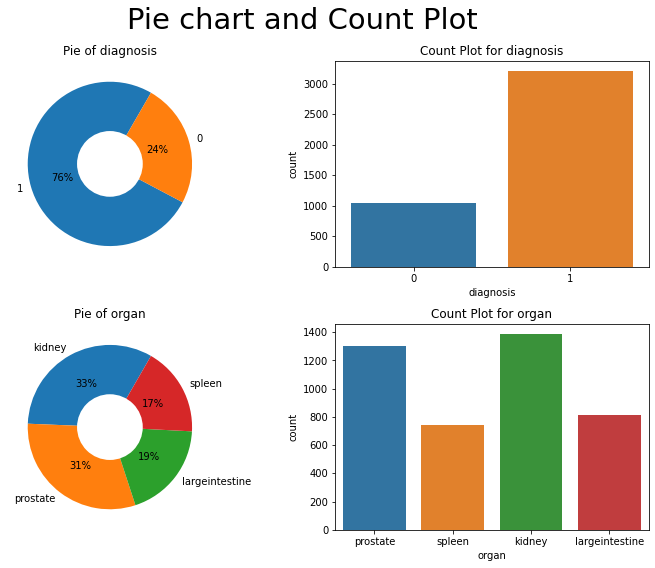

In [6]:
# Train Pie Chart
def pie_target(feat,df):
    fig, ax = plt.subplots(2,2,figsize=(10,8))
    for i in enumerate(feat):
            fig.suptitle('Pie chart and Count Plot', size = 29)
            ax[i[0],0].title.set_text(f'Pie of {i[1]}')
            labels = list(df[i[1]].value_counts().index)
            values = df[i[1]].value_counts()
            
            ax[i[0],0].pie(values,startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.6)
            ax[i[0],1].title.set_text(f'Count Plot for {i[1]}')
            sns.countplot(x=i[1],data=df ,ax=ax[i[0],1])
            ax[i[0],0].add_artist(plt.Circle((0,0),0.4,fc='white'))
    fig.tight_layout()        
    plt.show()
    
cat_features=['diagnosis', 'organ']
pie_target(cat_features,df_final)

# **Data Generator**

In [7]:
# ImageDataGenerator + albumentation
# https://www.kaggle.com/code/muki2003/hubmap-hpa-deep-learning-unet-cnn

# Tf.data + albumentation
# https://www.kaggle.com/code/junyingsg/tf-data-pipeline-with-albumentation-cutmix-up/notebook

class ImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, dataframe, batch_size, aug_size, status_training=False, image_size=256):
        self.dataframe = dataframe.reset_index(drop=True) # form chuan? df
        self.dim = image_size # Shape image, mask
        self.training = status_training # True = train, flase = test
        self.batch_size = batch_size
        self.aug_size = aug_size # Size agument (x4 dataset)
        self.pref = 'train' if status_training else 'test'
        
    def __len__(self): #Iteration - So batchsize trong 1 epoch (1 dataset)
        return np.ceil(len(self.dataframe) / self.batch_size).astype(int) 
    
    def resuffle_df(self): # Suffle df when complete 1 epoch
        if self.training == True:
            self.dataframe = self.dataframe.sample(frac=1.0).reset_index(drop=True)
            
    def __getitem__(self, index): # lay 1 batch_size tai vi tri index
        df_batch = self.dataframe.iloc[index*self.batch_size:(index+1)*self.batch_size]
#         print(df_batch)
        # load images,masks to TRAIN
        if self.training == True:
            images = np.zeros((df_batch.shape[0]*self.aug_size, self.dim, self.dim, 3)) # *4 = Augment x4
            masks = np.zeros((df_batch.shape[0]*self.aug_size, self.dim, self.dim, 1))
#             print(images.shape, masks.shape)
            vitri = -1
            for i, row in df_batch.iterrows():
                img = Image.open(row['image_path']).convert('RGB') 
                img = img.resize((self.dim, self.dim))
                img = np.array(img) #(256,256,3) uint8 [0,255]

                msk = Image.open(row['mask_path']).convert('L')
                msk = msk.resize((self.dim, self.dim))
                msk = np.array(msk) #(256,256) uint8 [0,1]
                msk = np.expand_dims(msk, axis=2)#(256,256,1)
#                 print(img.shape, msk.shape, img.dtype, msk.dtype, np.amin(img), np.amax(img), np.amin(msk), np.amax(msk))

        #Augmentations dataset: Input{Image [0-255] uint8, Mask [0-1] int} - Output {Image [0-1] float64, mask [0-1] float64}
                for j in range(self.aug_size):
                    vitri += 1
                    img_aug, msk_aug = self.augmentation(img,msk)
                    images[vitri,] = img_aug
                    masks[vitri,] = msk_aug
                    
            return images.astype('float32'), masks.astype('float32')
        
        #Load image test
        else: 
            images = np.zeros((df_batch.shape[0], self.dim, self.dim, 3))
            for i, row in df_batch.iterrows():
                img = Image.open('../input/hubmap-organ-segmentation/{}_images/{}.tiff'.format(self.pref, row['id'])).convert('RGB') 
                img = img.resize((self.dim, self.dim))
                img = np.array(img) / 255.
                img=img.astype('float32')
                pos = int(i%self.batch_size)
                images[pos,] = img
                
            return images
            

    def getAuguments(self): #https://github.com/albumentations-team/albumentations
        augs = [
            # Geometry based
            A.Flip(p=0.5),
            A.Rotate(limit=180, p=0.5),
            A.RandomResizedCrop(always_apply=False, p=0.33, height=self.dim, width=self.dim, scale=(0.7, 0.9), ratio=(1.0, 3.0), interpolation=3),
            # Noise/occlusion
            A.Blur(always_apply=False, p=0.33, blur_limit=(3, 9)),
            A.GaussNoise(always_apply=False, p=0.33, var_limit=(130.0, 350.0), per_channel=True, mean=0.0),
            A.ISONoise(always_apply=False, p=0.33, intensity=(0.1, 0.25), color_shift=(0.2, 0.6)),
            A.CoarseDropout(always_apply=False, p=0.5, max_holes=20, max_height=3, max_width=20, min_holes=5, min_height=1, min_width=1, fill_value=(255, 255, 255), mask_fill_value=None),  
            A.Downscale(always_apply=False, p=0.33, scale_min=0.7, scale_max=0.9, interpolation=0),
            # Color based
            A.HueSaturationValue(always_apply=False, p=0.3, hue_shift_limit=(-20, 20), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20)),
            A.RGBShift(always_apply=False, p=0.5, r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20)),
            A.RandomBrightnessContrast(always_apply=False, p=0.3, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True)
            
            # Augment theo test_image[1 góc tế bào, nhiễu vệt màu trắng, bị mờ, kệnh màu đỏ]
#             A.Flip(p=0.33),
#             A.Rotate(limit=180, p=0.33),
#             A.RandomResizedCrop(always_apply=False, p=0.75, height=self.dim, width=self.dim, scale=(0.7, 0.9), ratio=(1.0, 3.0), interpolation=3),
                #Noise
#             A.Blur(always_apply=False, p=0.5, blur_limit=(1, 8)),
#             A.GaussNoise(always_apply=False, p=0.5, var_limit=(130.0, 350.0), per_channel=True, mean=0.0),
#             A.CoarseDropout(always_apply=False, p=0.5, max_holes=10, max_height=8, max_width=20, min_holes=5, min_height=1, min_width=1, fill_value=(255, 255, 255), mask_fill_value=None),  
#                 #Color
#             A.RGBShift(always_apply=False, p=0.5, r_shift_limit=(82, 114), g_shift_limit=(-5, 0), b_shift_limit=(-2, 5)), # Red
#             A.HueSaturationValue(always_apply=False, p=0.5, hue_shift_limit=(-5, 5), sat_shift_limit=(-5, 7), val_shift_limit=(45, 89)) 
#             A.RandomBrightnessContrast(always_apply=False, p=1.0, brightness_limit=(0.2, 0.28), contrast_limit=(-0.07, 0.01), brightness_by_max=True)
        ]
        return A.Compose(augs)
    
    def augmentation(self, img, msk):
        list_aug = self.getAuguments()
        batch_augmented = list_aug(image=img.astype('uint8'), mask=msk.astype('int'))
        return batch_augmented['image']/255, batch_augmented['mask']


(8, 256, 256, 3) (8, 256, 256, 1)
(256, 256, 3) (256, 256, 1) float32 float32 0.0 1.0 0.0 1.0
[0. 1.]
2121


<Figure size 720x720 with 0 Axes>

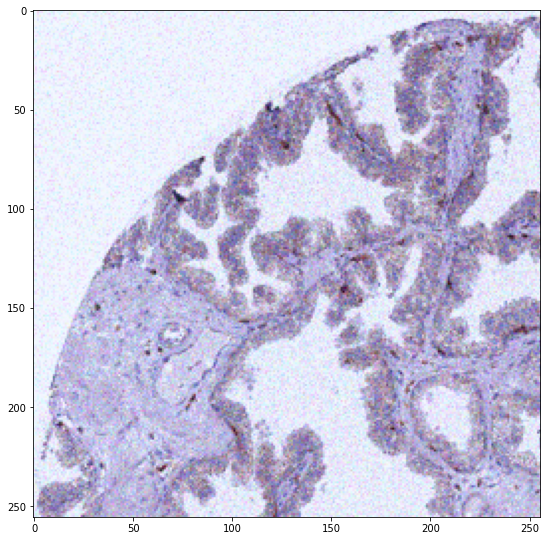

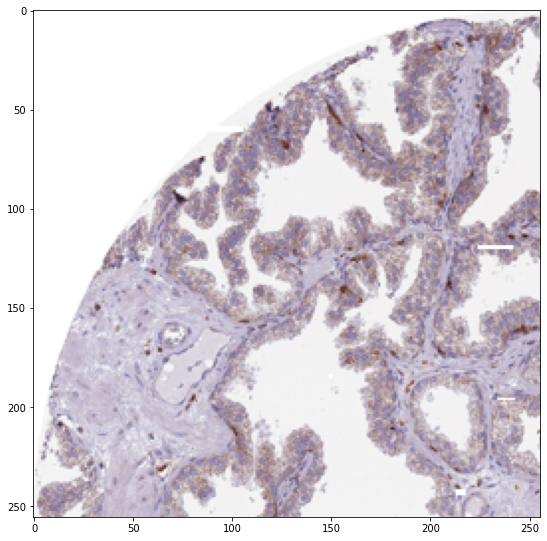

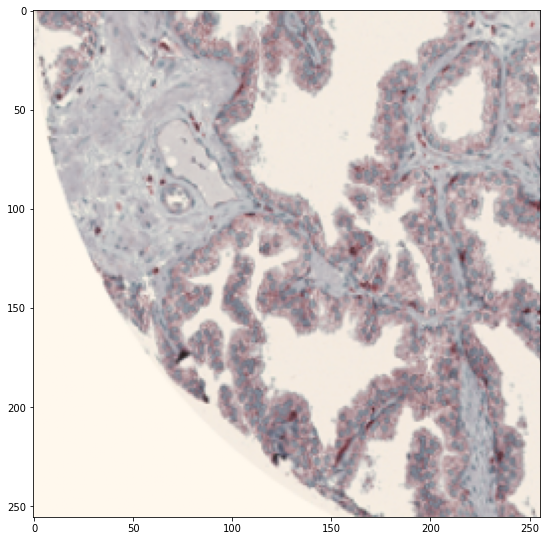

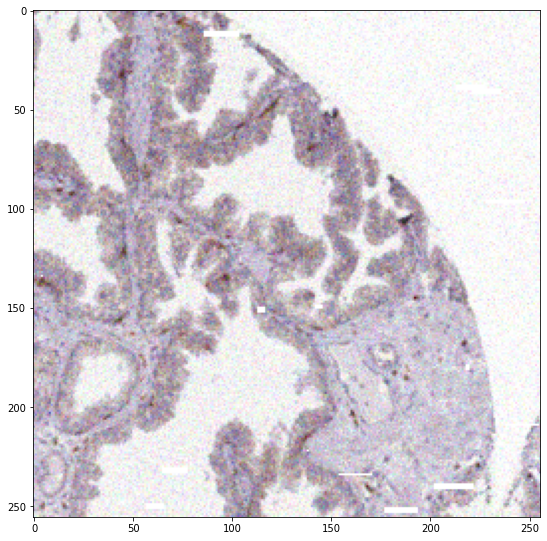

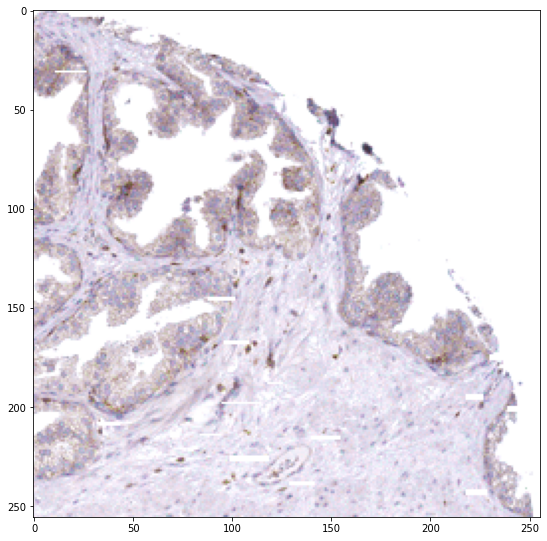

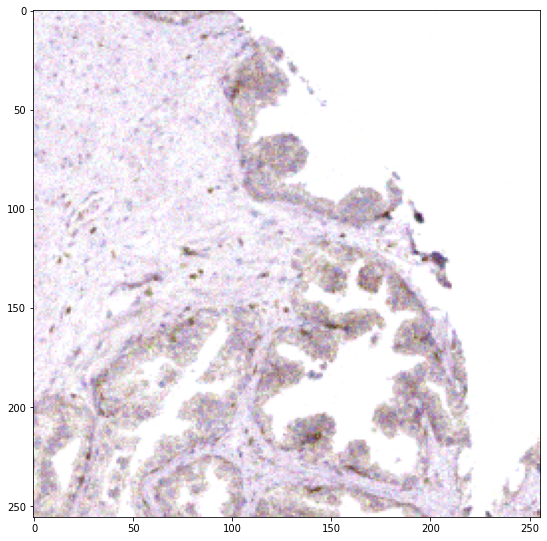

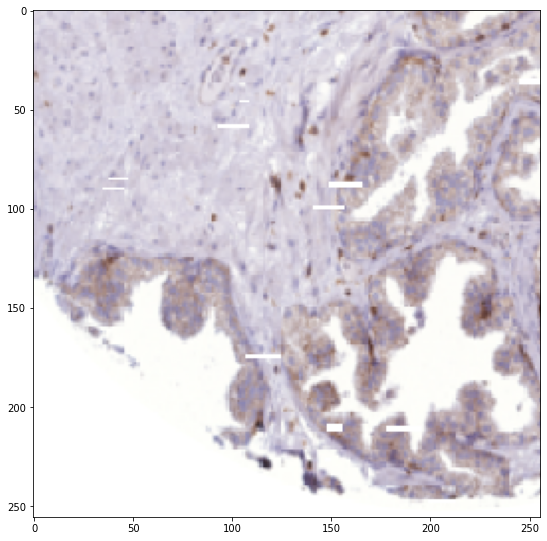

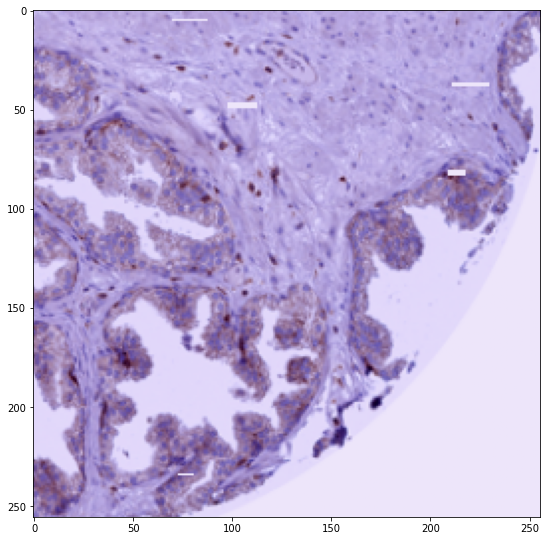

In [8]:
train_loader = ImageDataGenerator(dataframe = df_final, batch_size = 2 ,aug_size = 4, status_training = True, image_size = 256)
dataget_check = train_loader.__getitem__(2)
example_batch_imgs, example_batch_msks = dataget_check
print(example_batch_imgs.shape, example_batch_msks.shape)
example_img = example_batch_imgs[0]
example_msk = example_batch_msks[0]
print(example_img.shape, example_msk.shape, example_img.dtype, example_msk.dtype, np.amin(example_img), np.amax(example_img), np.amin(example_msk), np.amax(example_msk))
print(np.unique(example_msk))
plt.figure(figsize=(10, 10))
for i in range(8):
    plt.figure(figsize=(20, 20))
    plt.axis('off')
    plt.subplot(1, 2, 1)
    plt.imshow(dataget_check[0][i])
#     plt.imshow(dataget_check[1][i], alpha=0.3, cmap='gray') #, cmap='coolwarm'
    
print(train_loader.__len__()) # 615x8 = 4920 = len(df) - batch_size = 8

# **Pre-trained Segmentation Model**

In [9]:
import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

from segmentation_models import Unet, Linknet, PSPNet, FPN
from segmentation_models.utils import set_trainable

model = Unet('efficientnetb4', encoder_weights='imagenet', input_shape=(512, 512, 3), classes=1, activation='sigmoid')

# model.summary()
# tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)


Segmentation Models: using `keras` framework.


2022-09-22 04:03:23.456002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-22 04:03:23.590850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-22 04:03:23.592009: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-22 04:03:23.594338: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

71901184/71892840 [==============================] - 2s 0us/step


**Metric and Loss funcion**

In [10]:
from keras import backend as K
from keras.losses import binary_crossentropy
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

smooth=1.

def dice_coef(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred)
    return (2.0 * intersection + smooth) / (union + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def bce_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    # bce = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
    return dice_coef_loss(y_true, y_pred) + bce(y_true, y_pred)

def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

In [11]:
# Parameter
image_size = 512

batch_size = 4
aug_size = 1

epochs = 30
learning_rate = 1e-4

**Traning**

In [12]:
model = Unet('efficientnetb4', encoder_weights='imagenet', input_shape=(image_size, image_size, 3), classes=1, activation='sigmoid')

opt = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
model.compile(optimizer=opt, loss=bce_dice_loss, metrics=['accuracy', iou, dice_coef])

callbacks = [ModelCheckpoint('./Effi4_all.h5', verbose=0, save_best_only=True),
            ReduceLROnPlateau(monitor='val_dice_coef', mode = 'max', factor=0.1, patience=5, verbose=1, min_lr=1e-11),
            EarlyStopping(monitor='val_dice_coef', mode = 'max', restore_best_weights=True, patience=15)]

df_train, df_valid = train_test_split(df_final, test_size=0.3, shuffle=True, random_state=20)
train_dataset = ImageDataGenerator(df_train, batch_size, aug_size, True, image_size)
valid_dataset = ImageDataGenerator(df_valid, batch_size, aug_size, True, image_size)



In [13]:
history = model.fit(train_dataset,
                    epochs=epochs, 
                    callbacks=callbacks,
                    validation_data = valid_dataset
                    )

2022-09-22 04:03:36.164801: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-09-22 04:03:55.697579: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


743/743 [==============================] - 544s 695ms/step - loss: 0.8407 - accuracy: 0.8669 - iou: 0.3384 - dice_coef: 0.4845 - val_loss: 0.5569 - val_accuracy: 0.9263 - val_iou: 0.4887 - val_dice_coef: 0.6363


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/30
743/743 [==============================] - 451s 606ms/step - loss: 0.6041 - accuracy: 0.9145 - iou: 0.4845 - dice_coef: 0.6340 - val_loss: 0.4857 - val_accuracy: 0.9371 - val_iou: 0.5376 - val_dice_coef: 0.6786
Epoch 3/30
743/743 [==============================] - 449s 605ms/step - loss: 0.5119 - accuracy: 0.9285 - iou: 0.5510 - dice_coef: 0.6943 - val_loss: 0.5050 - val_accuracy: 0.9225 - val_iou: 0.5884 - val_dice_coef: 0.7166
Epoch 4/30
743/743 [==============================] - 452s 608ms/step - loss: 0.4675 - accuracy: 0.9353 - iou: 0.5875 - dice_coef: 0.7250 - val_loss: 0.4307 - val_accuracy: 0.9442 - val_iou: 0.5999 - val_dice_coef: 0.7268
Epoch 5/30
743/743 [==============================] - 450s 606ms/step - loss: 0.4280 - accuracy: 0.9408 - iou: 0.6170 - dice_coef: 0.7489 - val_loss: 0.3884 - val_accuracy: 0.9490 - val_iou: 0.6430 - val_dice_coef: 0.7637
Epoch 6/30
743/743 [==============================] - 454s 611ms/step - loss: 0.4105 - accuracy: 0.9434 - iou: 0

Text(0.5, 1.0, 'Dice Coef')

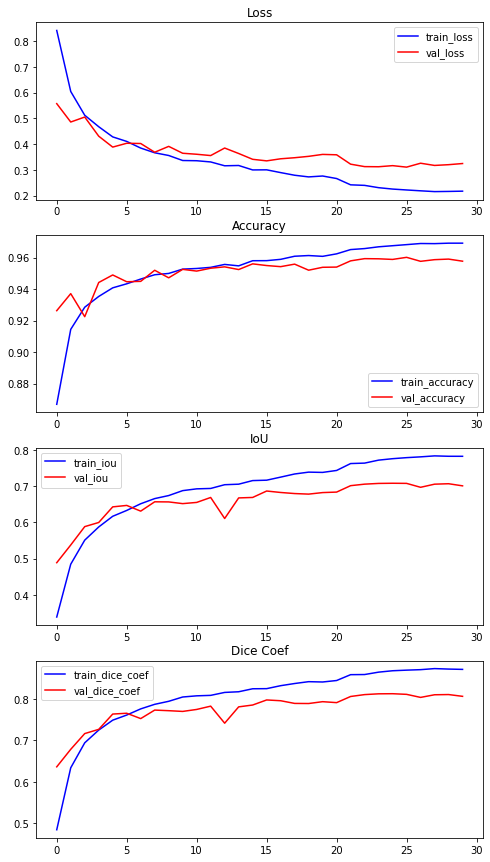

In [14]:
plt.figure(figsize=(8,15))
plt.subplot(4,1,1)
plt.plot(model.history.history['loss'], 'b-', label='train_loss')
plt.plot(model.history.history['val_loss'], 'r-', label='val_loss')
plt.legend(loc='best')
plt.title('Loss')

plt.subplot(4,1,2)
plt.plot(model.history.history['accuracy'], 'b-', label='train_accuracy')
plt.plot(model.history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.legend(loc='best')
plt.title('Accuracy')

plt.subplot(4,1,3)
plt.plot(model.history.history['iou'], 'b-', label='train_iou')
plt.plot(model.history.history['val_iou'], 'r-', label='val_iou')
plt.legend(loc='best')
plt.title('IoU')

plt.subplot(4,1,4)
plt.plot(model.history.history['dice_coef'], 'b-', label='train_dice_coef')
plt.plot(model.history.history['val_dice_coef'], 'r-', label='val_dice_coef')
plt.legend(loc='best')
plt.title('Dice Coef')

# **Eval**

(4, 512, 512, 3) (4, 512, 512, 1) float32 float32 0.039215688 1.0 0.0 1.0
[0. 1.]
(4, 512, 512, 1) (4, 512, 512, 1) float32 float32 0.0 1.0 0.0 1.0
[0. 1.]


<Figure size 720x720 with 0 Axes>

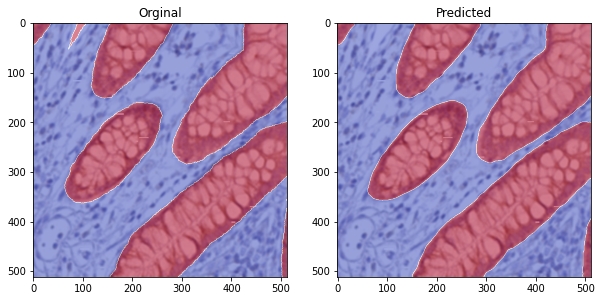

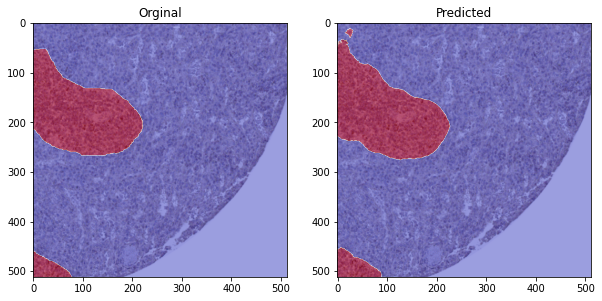

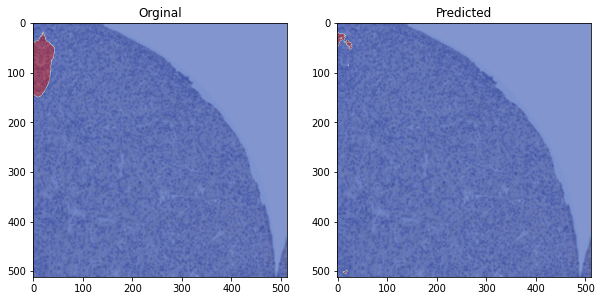

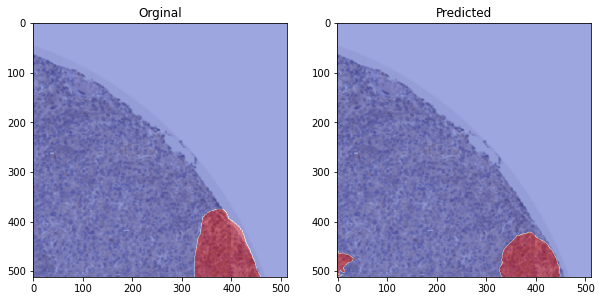

In [15]:
# Model Evaluation and Predidtion
model_eval = tf.keras.models.load_model("./Effi4_all.h5",compile=False)
tx, ty = valid_dataset[0]
pty = model_eval.predict(tx).round()


print(tx.shape, ty.shape, tx.dtype, ty.dtype, np.amin(tx), np.amax(tx), np.amin(ty), np.amax(ty))
print(np.unique(ty))


print(pty.shape, pty.shape, pty.dtype, pty.dtype, np.amin(pty), np.amax(pty), np.amin(pty), np.amax(pty))
print(np.unique(pty))


# Orginal Image VS Mask
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title('Orginal')
    plt.imshow(tx[i])
    plt.imshow(ty[i], cmap='coolwarm', alpha=0.5)
    plt.subplot(1, 2, 2)
    plt.title('Predicted')
    plt.imshow(tx[i])
    plt.imshow(pty[i], cmap='coolwarm', alpha=0.5)

(1, 512, 512, 3) (1, 512, 512, 1) float64 float32 0.0 1.0 2.330957e-08 0.994162
[2.3309569e-08 2.3509241e-08 2.4595501e-08 ... 9.9402666e-01 9.9404800e-01
 9.9416202e-01]


<Figure size 1440x1440 with 0 Axes>

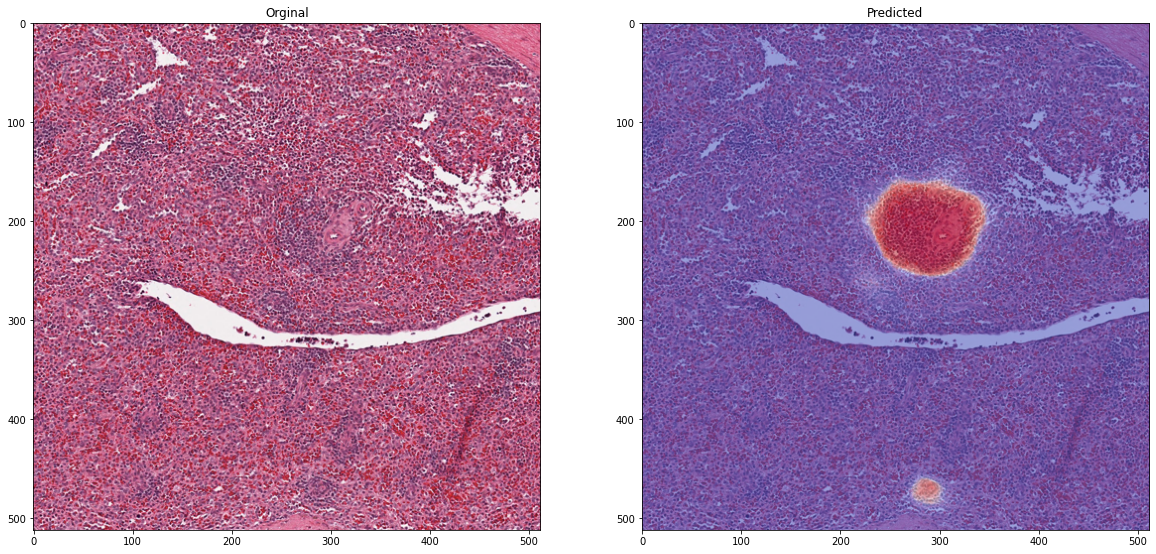

In [16]:
test_df = pd.read_csv('../input/hubmap-organ-segmentation/test.csv')
test_dataset = ImageDataGenerator(test_df, 4, 1, False, image_size)

model_pred = tf.keras.models.load_model("./Effi4_all.h5", compile=False)

preds = model_pred.predict(test_dataset)

print(test_dataset[0].shape, preds.shape, test_dataset[0].dtype, preds[0].dtype, np.amin(test_dataset[0]), np.amax(test_dataset[0]), np.amin(preds[0]), np.amax(preds[0]))
print(np.unique(preds[0]))

plt.figure(figsize=(20, 20))
for i in range(1):
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    plt.title('Orginal')
    plt.imshow(test_dataset[0][0])
    plt.subplot(1, 2, 2)
    plt.title('Predicted')
    plt.imshow(test_dataset[0][0])
    plt.imshow(preds[i], cmap='coolwarm', alpha=0.5)

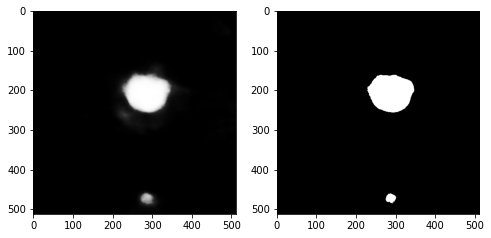

In [17]:
threshold = 0.5


pred_mask = np.where(preds > threshold, 1, 0)[0]

fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 1
fig.add_subplot(1, 2, 1)
plt.imshow(preds[0], cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(pred_mask, cmap='gray')
plt.show()

# **Perdict Test Image**

In [18]:
!zip -r file.zip '/kaggle/working'

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/Effi4_all.h5 (deflated 8%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/__notebook_source__.ipynb (deflated 44%)


In [19]:
from IPython.display import FileLink
FileLink(r'/kaggle/working/file.zip')

# from IPython.display import FileLink, FileLinks
# FileLinks('') #lists all downloadable files on server

/kaggle/working/file.zip